In [1]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    path_to_file = '/content/gdrive/My Drive/Data Science Files/NUS_courses/Applied_Machine_Learning/Applied_ML/Practical' # Please adjust the path accordingly
    os.chdir(path_to_file)
    !pwd

Mounted at /content/gdrive
/content/gdrive/My Drive/Data Science Files/NUS_courses/Applied_Machine_Learning/Applied_ML/Practical


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.shape

(768, 9)

In [5]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
X = data.drop(['Outcome'], axis =1)
y = data.Outcome

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=0)

In [8]:
#Sacaling the data into a smaller range (-3 to +3)
mean = X_train.mean()
std = X_train.std()

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [9]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
#Prediction on Testing samples
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1])

In [11]:
classifier.score(X_train, y_train)

0.845437616387337

In [12]:
classifier.score(X_test, y_test)

0.7272727272727273

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[131  26]
 [ 37  37]]
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       157
           1       0.59      0.50      0.54        74

    accuracy                           0.73       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.72      0.73      0.72       231



# Exercise
Try different K values and find the best K value which can maximize test accuracy

In [23]:
from sklearn.neighbors import KNeighborsClassifier
train_acc = []
test_acc = []
for k in range(3,30,2):
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier.fit(X_train, y_train)

  train_acc.append(classifier.score(X_train, y_train))
  test_acc.append(classifier.score(X_test, y_test))

  print(classifier.score(X_train, y_train))  # training accuracy
  print(classifier.score(X_test, y_test)) # test accuracy

0.845437616387337
0.7272727272727273
0.7951582867783985
0.7705627705627706
0.7802607076350093
0.7445887445887446
0.7802607076350093
0.7705627705627706
0.7877094972067039
0.7662337662337663
0.7728119180633147
0.7792207792207793
0.7746741154562383
0.7748917748917749
0.776536312849162
0.7575757575757576
0.7821229050279329
0.7619047619047619
0.7746741154562383
0.7575757575757576
0.7635009310986964
0.7445887445887446
0.7616387337057728
0.7662337662337663
0.7690875232774674
0.7662337662337663
0.770949720670391
0.7662337662337663


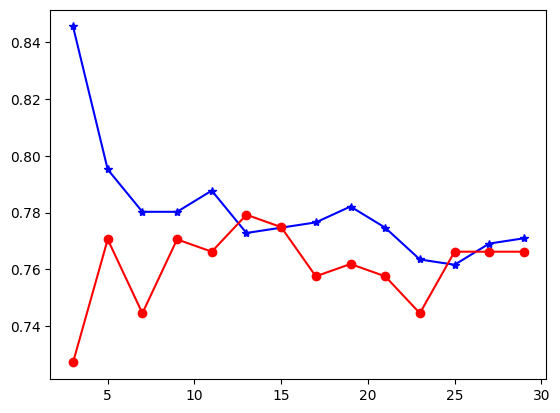

In [25]:
plt.plot(range(3,30,2),train_acc, 'b-*', label='train_acc')
plt.plot(range(3,30,2),test_acc, 'r-o', label='test_acc')
